Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

In [2]:
class MinibatchKMeans:
    def __init__(self, n_clusters, max_iter=200, batch_size_proportion=1):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.batch_size_proportion = batch_size_proportion

    def fit(self, X):
        m, n = X.shape

        rng = np.random.RandomState(42)
        initial_center_index = rng.permutation(m)[:self.n_clusters]
        self.centers = X[initial_center_index]

        iteration = 0
        while iteration <= self.max_iter:
            batch_index = rng.choice(m, size=int(self.batch_size_proportion * m), replace=False)
            X_batch = X[batch_index]
            labels = pairwise_distances_argmin(X_batch, self.centers)
            new_centers = []
            for i in range(self.n_clusters):
                new_centers.append(X_batch[labels == i].mean(axis=0))
            
            new_centers = np.array(new_centers)

            if np.allclose(self.centers, new_centers, rtol=0.01):
                break
            else:
                self.centers = new_centers

            # if iteration % 5 == 0:
            #     pred = pairwise_distances_argmin(X, new_centers)
            #     plt.figure(figsize=(12, 8))
            #     plt.title(f'Iteration {iteration}')
            #     plt.scatter(X[:,0], X[:,1], c=pred)
            #     plt.scatter(new_centers[:,0], new_centers[:,1], s=100, c='black', alpha=0.6)
            
            iteration += 1

        variation = 0
        for i in range(self.n_clusters):
            variation += ((X_batch[labels == i] - new_centers[i])**2).sum()
        print(f'Break at iteration {iteration}')
        print(f'Cluster variation = {variation}')
        self.variation = variation
    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)

    def plot_scatter(self, X):
        pred = self.predict(X)
        plt.figure(figsize=(12, 8))
        plt.scatter(X[:,0], X[:,1], c=pred)
        plt.scatter(self.centers[:,0], self.centers[:,1], s=100, c='black', alpha=0.6)

Break at iteration 13
Cluster variation = 1006.3420400278767


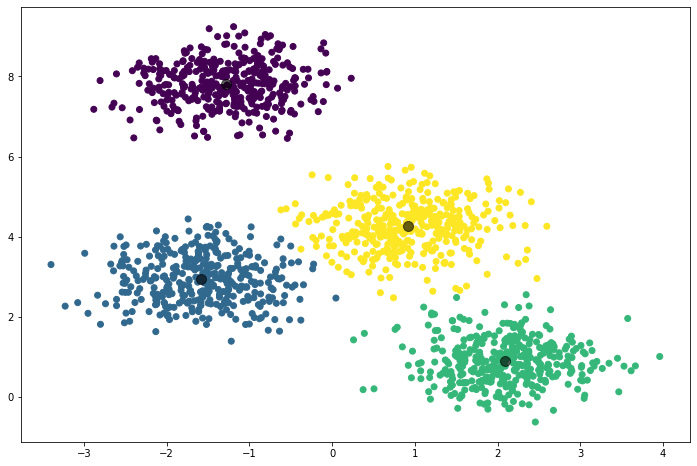

In [3]:
clf = MinibatchKMeans(n_clusters=4, )
clf.fit(X)
clf.plot_scatter(X)

Break at iteration 3
Cluster variation = 5805.884294336651
Break at iteration 10
Cluster variation = 2493.84603609642
Break at iteration 13
Cluster variation = 1006.3420400278767
Break at iteration 6
Cluster variation = 924.8185601440946
Break at iteration 8
Cluster variation = 842.9343362706458
Break at iteration 15
Cluster variation = 789.7577860102625
Break at iteration 15
Cluster variation = 720.4248154033759
Break at iteration 15
Cluster variation = 631.2857003877194


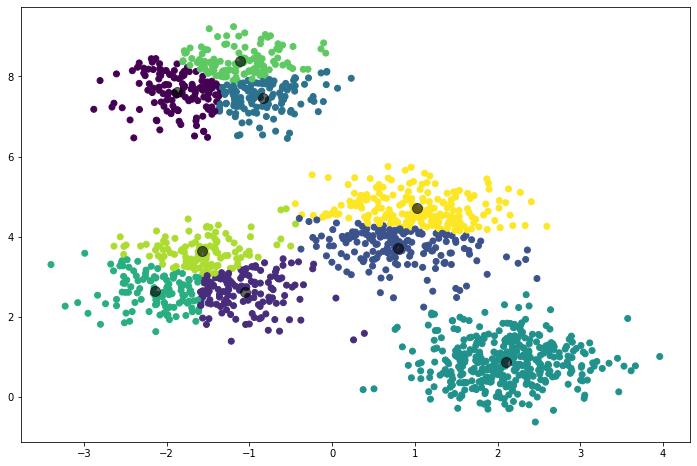

In [4]:
k_range = list(range(2, 10))
for k in k_range:
    clf = MinibatchKMeans(n_clusters=k, )
    clf.fit(X)
clf.plot_scatter(X)
# more k always give less cluster variation due to tigher cluster

Break at iteration 3
Cluster variation = 5805.884294336651
Break at iteration 10
Cluster variation = 2493.84603609642
Break at iteration 13
Cluster variation = 1006.3420400278767
Break at iteration 6
Cluster variation = 924.8185601440946
Break at iteration 8
Cluster variation = 842.9343362706458
Break at iteration 15
Cluster variation = 789.7577860102625
Break at iteration 15
Cluster variation = 720.4248154033759
Break at iteration 15
Cluster variation = 631.2857003877194


Text(0, 0.5, 'Cluster variation')

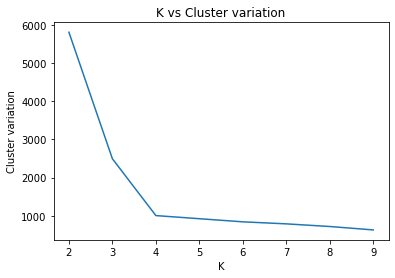

In [5]:
# elbow method to identofy best k
k_range = list(range(2, 10))
variation_from_each_k = []
for k in k_range:
    clf = MinibatchKMeans(n_clusters=k, )
    clf.fit(X)
    variation_from_each_k.append(clf.variation)
plt.plot(k_range, variation_from_each_k)
plt.title('K vs Cluster variation')
plt.xlabel('K')
plt.ylabel('Cluster variation')

when using low `batch_size_proportion`, it takes more iterations to converge and sometimes not converge at all

Break at iteration 201
Cluster variation = 707.869566887181


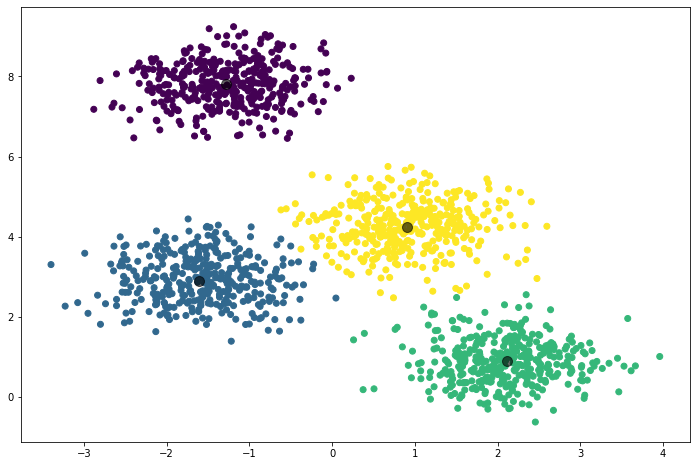

In [6]:
# batch_size_proportion=0.7 (using 70 % of total data)
clf = MinibatchKMeans(n_clusters=4, batch_size_proportion=0.7)
clf.fit(X)
clf.plot_scatter(X)

Break at iteration 190
Cluster variation = 1208.625913364573


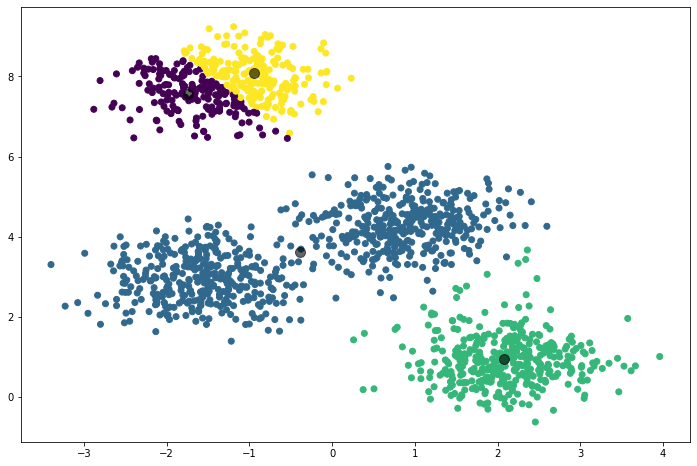

In [7]:
# batch_size_proportion=0.5 (using 50 % of total data)
clf = MinibatchKMeans(n_clusters=4, batch_size_proportion=0.5)
clf.fit(X)
clf.plot_scatter(X)